# ONLINE SHOPPERS INTENTION

CREATED BY: NABIL SHAJAHAN

**A real-time online shopper behavior analysis system consisting of two modules which simultaneously predicts the visitor’s shopping intent and Web site abandonment likelihood and the findings support the feasibility of accurate and scalable purchasing intention prediction for virtual shopping environment using clickstream and session information data.**
                                                                                                                         
**Data Source: http://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset**

### ADDITIONAL INFORMATION

#### Numerical features
| Feature name | Feature description                                                 | Min. val | Max. val | SD     |
|:-------------|:--------------------------------------------------------------------|:---------|:---------|:-------|
| Admin.       | #pages visited by the visitor about account management              | 0        | 27       | 3.32   |
| Ad. duration | #seconds spent by the visitor on account management related pages	 | 0        | 3398     | 176.70 |
| Info.        | #informational pages visited by the visitor                         | 0        | 24       | 1.26   |
| Info. durat. | #seconds spent by the visitor on informational pages	             | 0        | 2549     | 140.64 |
| Prod.        | #pages visited by visitor about product related pages	             | 0        | 705      | 44.45  |
| Prod.durat.  | #seconds spent by the visitor on product related pages	             | 0        | 63,973   | 1912.3 |
| Bounce rate  | Average bounce rate value of the pages visited by the visitor	     | 0        | 0.2      | 0.04   |
| Exit rate	   | Average exit rate value of the pages visited by the visitor         | 0        | 0.2      | 0.05   |
| Page value   | Average page value of the pages visited by the visitor	             | 0        | 361      | 18.55  |
| Special day  | Closeness of the site visiting time to a special day	             | 0        | 1.0      | 0.19   |

#### Categorical features
| Feature name        | Feature description                                                      | Number of Values |
|:--------------------|:-------------------------------------------------------------------------|:-----------------|
| OperatingSystems    | Operating system of the visitor                                          | 8                |
| Browser             | Browser of the visitor                                                   | 13               |
| Region              | Geographic region from which the session has been started by the visitor | 9                |
| TrafficType         | Traffic source (e.g., banner, SMS, direct)                               | 20               |
| VisitorType         | Visitor type as “New Visitor,” “Returning Visitor,” and “Other”	         | 3                |
| Weekend             | Boolean value indicating whether the date of the visit is weekend        | 2                |
| Month               | Month value of the visit date                                            | 12               |
| Revenue             | Class label: whether the visit has been finalized with a transaction     | 2                |

**The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.**

IMPORTING LIBRARIES

In [4]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

LOADING THE DATASET

In [5]:
data = pd.read_csv("online_shoppers_intention.csv")
print("\t")
print("Online Shoppers Purchase Intentions")
print("\t")
data

	
Online Shoppers Purchase Intentions
	


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


BASIC DATASET INFORMATION

In [15]:
# Check the number of rows and columns
print("\t")
print(f"The shape of the dataset is {data.shape}")

	
The shape of the dataset is (12330, 18)


In [17]:
# Get concise information about the dataset
print("\t")
print("Dataset Information:")
print("\t")
data.info()

	
Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 1

In [19]:
# Summary statistics
print("\t")
print("Summary Statistics:")
print("\t")
data.describe()

	
Summary Statistics:
	


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [21]:
# Checking unique values in categorical columns
print("\t")
print("Unique Values in Categorical columns:")
print("\t")
data.nunique()

	
Unique Values in Categorical columns:
	


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [23]:
# Check for missing values
print("\t")
print("Total number of missing values:")
print("\t")
data.isnull().sum()

	
Total number of missing values:
	


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
# Check for duplicate rows
print("\t")
print(f"The shape of the dataset before removing duplicates is {data.shape}")
print("\t")
print(f"Total number of duplicate values is {data.duplicated().sum()}")

	
The shape of the dataset before removing duplicates is (12330, 18)
	
Total number of duplicate values is 125


In [8]:
# Remove duplicates if necessary
data = data.drop_duplicates()

In [10]:
print("\t")
print(f"The shape of the dataset after removing the duplicates is {data.shape}")

	
The shape of the dataset after removing the duplicates is (12205, 18)


EXPLORATIVE DATA ANALYSIS

***Pie Chart: To see the proportion of visitors who made a purchase (Revenue=True) vs. those who didn’t (Revenue=False).***

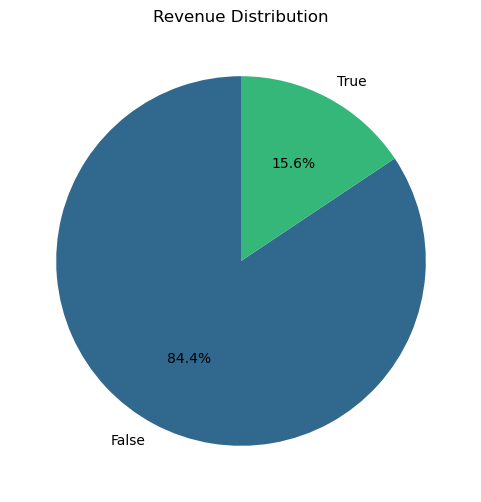

In [41]:
# Count occurrences of each category in the Revenue column
revenue_counts = data['Revenue'].value_counts()

# Define colors using the viridis palette
colors = sns.color_palette("viridis", len(revenue_counts))

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(revenue_counts, labels=revenue_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Revenue Distribution")
plt.show()

In [45]:
# Count occurrences of each category in the Revenue column
revenue_counts = data['Revenue'].value_counts()
revenue_counts

Revenue
False    10297
True      1908
Name: count, dtype: int64

**The above plot and count clearly shows that only 1908 of the total 12205 visitors have generated revenue. This makes the dataset highly imbalanced and we will have to apply SMOTE/NearMiss to mitigate this shortcoming.**

***Bar Plot: To observe visitor's patterns across different features.***

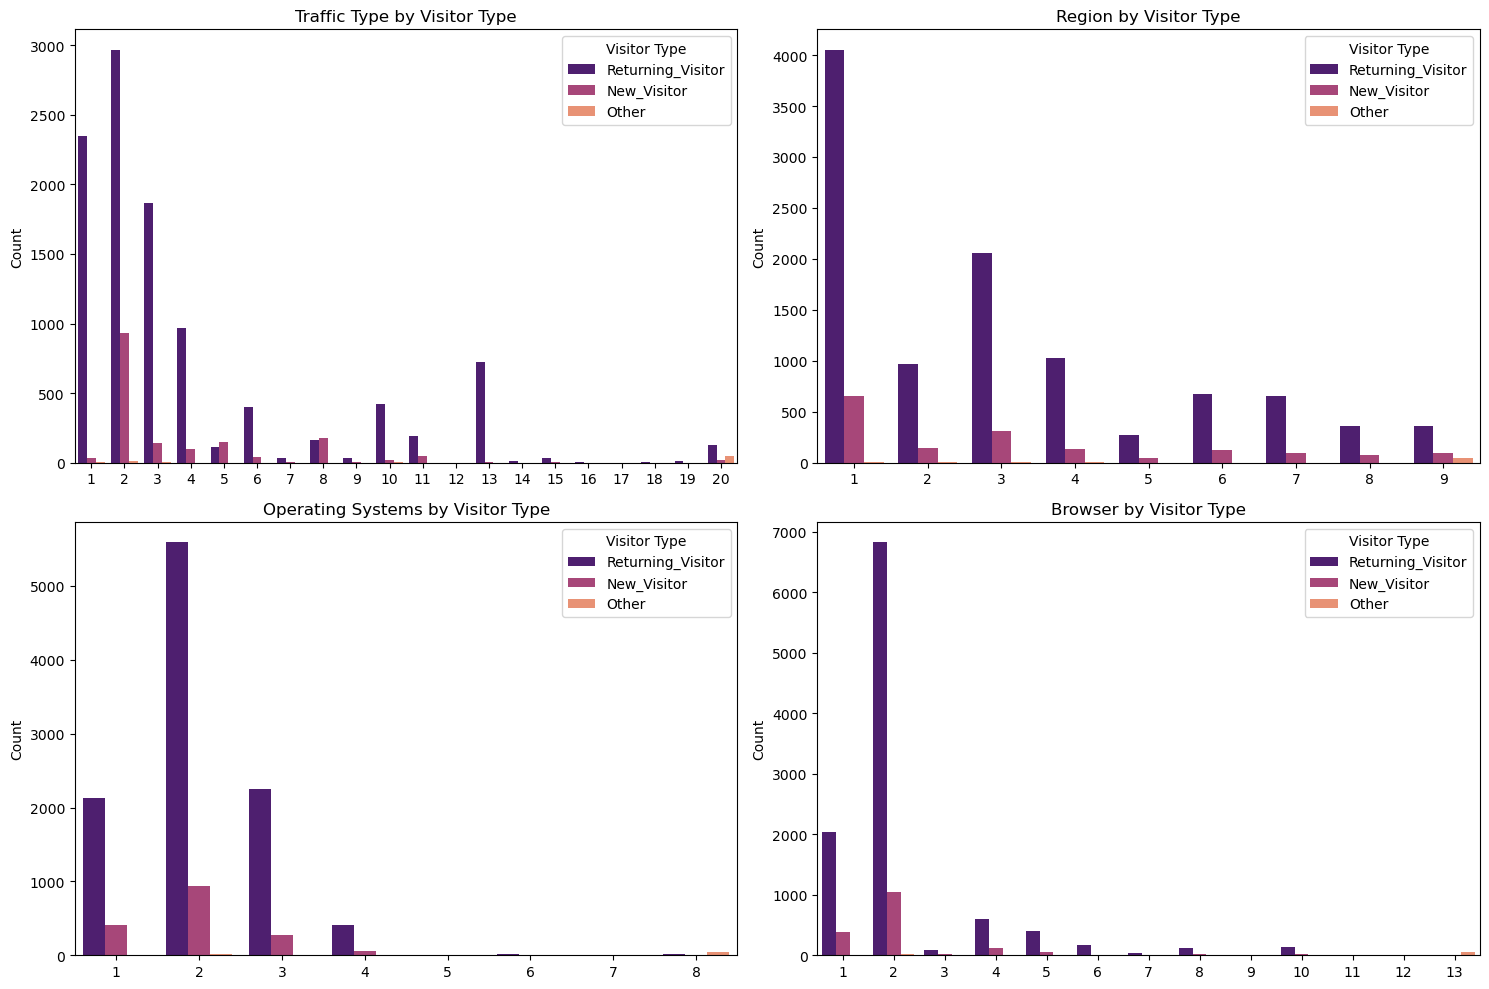

In [69]:
# Set figure size and create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Define categories for plotting
categories = ['TrafficType', 'Region', 'OperatingSystems', 'Browser']
titles = ["Traffic Type", "Region", "Operating Systems", "Browser"]

# Loop through categories and create count plots
for i, category in enumerate(categories):
    row, col = divmod(i, 2)  # Calculate row and column index
    sns.countplot(x=category, hue='VisitorType', data=data, palette='magma', ax=axes[row, col])
    axes[row, col].set_title(f"{titles[i]} by Visitor Type")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Count")
    axes[row, col].legend(title="Visitor Type")
    axes[row, col].tick_params(axis='x')  # Rotate x labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

***Revenue Count across all months and across Special Days***

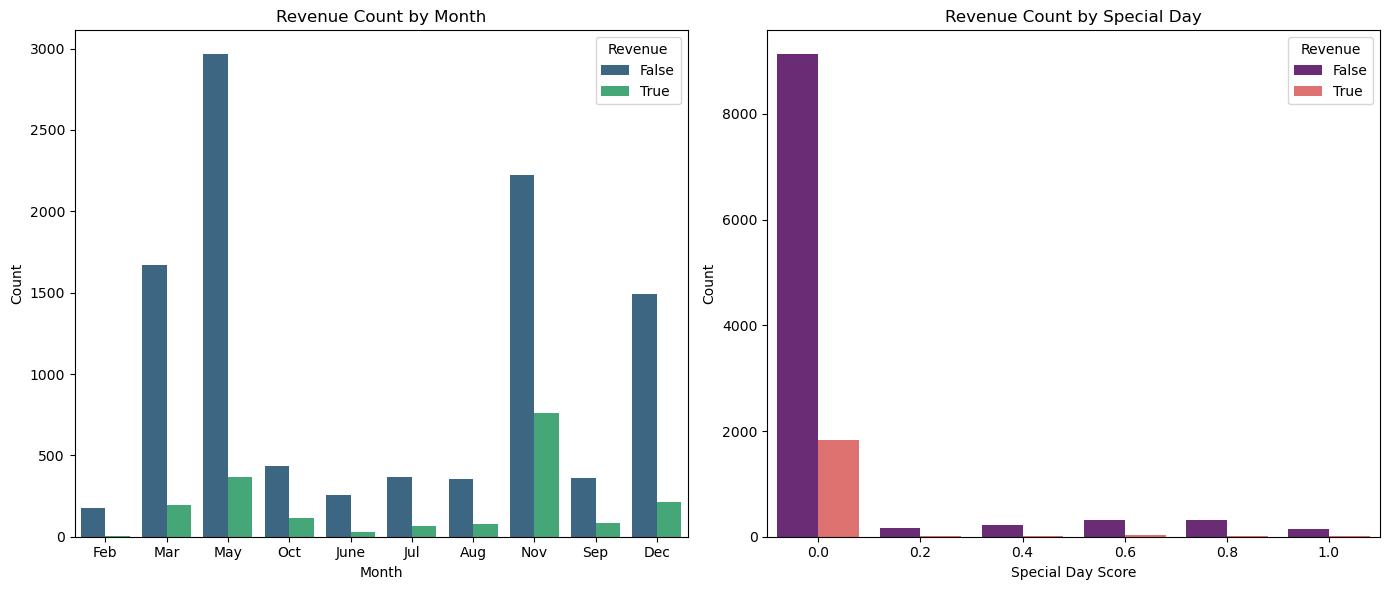

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Revenue by Month
sns.countplot(x='Month', hue='Revenue', data=data, palette='viridis', ax=axes[0])
axes[0].set_title("Revenue Count by Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Count")
axes[0].legend(title="Revenue")
axes[0].tick_params(axis='x', rotation=0)

# Revenue by SpecialDay
sns.countplot(x='SpecialDay', hue='Revenue', data=data, palette='magma', ax=axes[1])
axes[1].set_title("Revenue Count by Special Day")
axes[1].set_xlabel("Special Day Score")
axes[1].set_ylabel("Count")
axes[1].legend(title="Revenue")

# Adjust layout
plt.tight_layout()
plt.show()

1. The months of March and May showed highest number of visitors, however, the number of transactions are not reasonably proportional.
2. Most purchases has occured in November. This can be attributed to pre-Christmas sales, Black Friday, and Thanksgiving.
3. Most number of transactions occur on the Special Day (such as Christmas, New Year's, Thanksgiving, etc.)

***Revenue Count across Weekdays and Weekends***

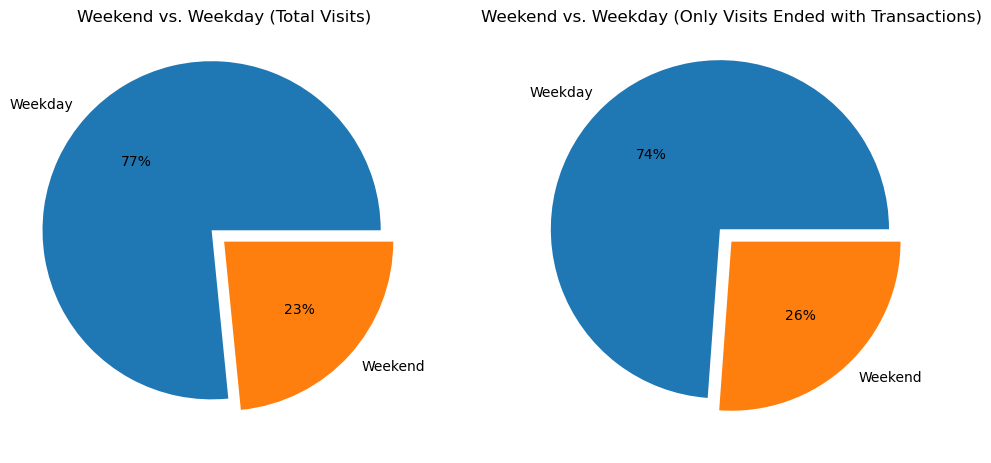

In [94]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data[data['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

We can observe that weekdays or weekends do not significantly contribute to visits or transactions made. Both plots are almost at the 75-25 % range.

DATA CLEANING

In [12]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for VisitorType
le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])

# One-Hot Encoding for Month
data = pd.get_dummies(data, columns=['Month'], drop_first=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  OperatingSystems         12205 non-null  int64  
 11  Browser                  12205 non-null  int64  
 12  Region                   12205 non-null  int64  
 13  TrafficType              12205 non-null  int64  
 14  VisitorType              12

In [16]:
# Convert categorical columns to 'category' type
categorical_cols = ['VisitorType']
data[categorical_cols] = data[categorical_cols].astype('category')

# Convert boolean columns
data['Revenue'] = data['Revenue'].astype(bool)
data['Weekend'] = data['Weekend'].astype(bool)

# Convert numerical columns to float (ensuring consistency)
num_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
data[num_cols] = data[num_cols].astype(float)

# Save as a new cleaned dataset
cleaned_data = data.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12205 non-null  int64   
 1   Administrative_Duration  12205 non-null  float64 
 2   Informational            12205 non-null  int64   
 3   Informational_Duration   12205 non-null  float64 
 4   ProductRelated           12205 non-null  int64   
 5   ProductRelated_Duration  12205 non-null  float64 
 6   BounceRates              12205 non-null  float64 
 7   ExitRates                12205 non-null  float64 
 8   PageValues               12205 non-null  float64 
 9   SpecialDay               12205 non-null  float64 
 10  OperatingSystems         12205 non-null  int64   
 11  Browser                  12205 non-null  int64   
 12  Region                   12205 non-null  int64   
 13  TrafficType              12205 non-null  int64   
 14  VisitorType

HANDLE OUTLIERS

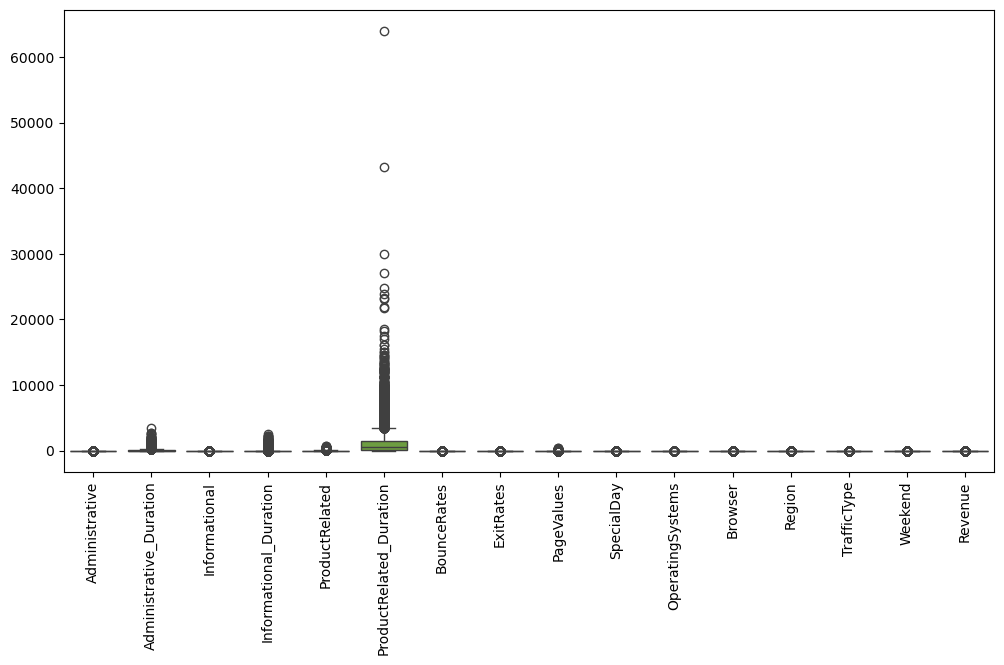

In [108]:
plt.figure(figsize=(12,6))
sns.boxplot(data=cleaned_data)
plt.xticks(rotation=90)
plt.show()

In [18]:
num_cols = cleaned_data.select_dtypes(include=['number']).columns.tolist()

# Compute skewness & kurtosis
skewness = cleaned_data[num_cols].skew()
kurtosis = cleaned_data[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness": skewness, "Kurtosis": kurtosis})

# Reset index and sort by Skewness in descending order
normality_stats_sorted = normality_stats.reset_index().rename(columns={"index": "Feature"})
normality_stats_sorted = normality_stats_sorted.sort_values(by="Skewness", ascending=False)

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Feature,Skewness,Kurtosis
3,Informational_Duration,7.5403,75.5342
5,ProductRelated_Duration,7.2532,136.6815
8,PageValues,6.3510,64.9980
1,Administrative_Duration,5.5922,50.1368
4,ProductRelated,4.3334,31.0727
2,Informational,4.0142,26.6593
9,SpecialDay,3.2859,9.7976
11,Browser,3.2174,12.5536
6,BounceRates,3.1624,9.3340
7,ExitRates,2.2346,4.6421


In [20]:
from scipy import stats

num_cols = cleaned_data.select_dtypes(include=['number']).columns

z_scores = stats.zscore(cleaned_data.select_dtypes(include=['number']))
outliers = (z_scores > 3) | (z_scores < -3)
data_removed = cleaned_data[(~outliers).all(axis=1)]

print("Shape before removing outliers:", cleaned_data.shape)
print("Shape after removing outliers:", data_removed.shape)

Shape before removing outliers: (12205, 26)
Shape after removing outliers: (9566, 26)


In [22]:
# Compute skewness & kurtosis after Z-Score
skewness = data_removed[num_cols].skew()
kurtosis = data_removed[num_cols].kurt()

# Combine into DataFrame
normality_stats = pd.DataFrame({"Skewness after Z-Score": skewness, "Kurtosis after Z-Score": kurtosis})

# Sort by Skewness in descending order
normality_stats_sorted = normality_stats.sort_values(by="Skewness after Z-Score", ascending=False)

# Display as a styled table
import pandas as pd
from IPython.display import display

# Display table with formatting (works in Jupyter Notebook)
display(normality_stats_sorted.style.format(precision=4))

,Skewness after Z-Score,Kurtosis after Z-Score
Informational_Duration,4.7161,25.1380
SpecialDay,4.0067,14.9203
PageValues,3.1407,9.8042
BounceRates,3.0560,11.2607
Informational,2.6597,6.6944
Administrative_Duration,2.3814,6.4659
ProductRelated_Duration,2.0053,4.5481
ProductRelated,1.9855,4.3932
Browser,1.9436,4.1684
ExitRates,1.7982,3.5649


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either standardization or normalization
scaler = StandardScaler()  # For normal distribution
# scaler = MinMaxScaler()  # Uncomment for normalization (0 to 1 scaling)

# Fit and transform numerical columns
data_removed[num_cols] = scaler.fit_transform(data_removed[num_cols])

FEATURE SELECTION

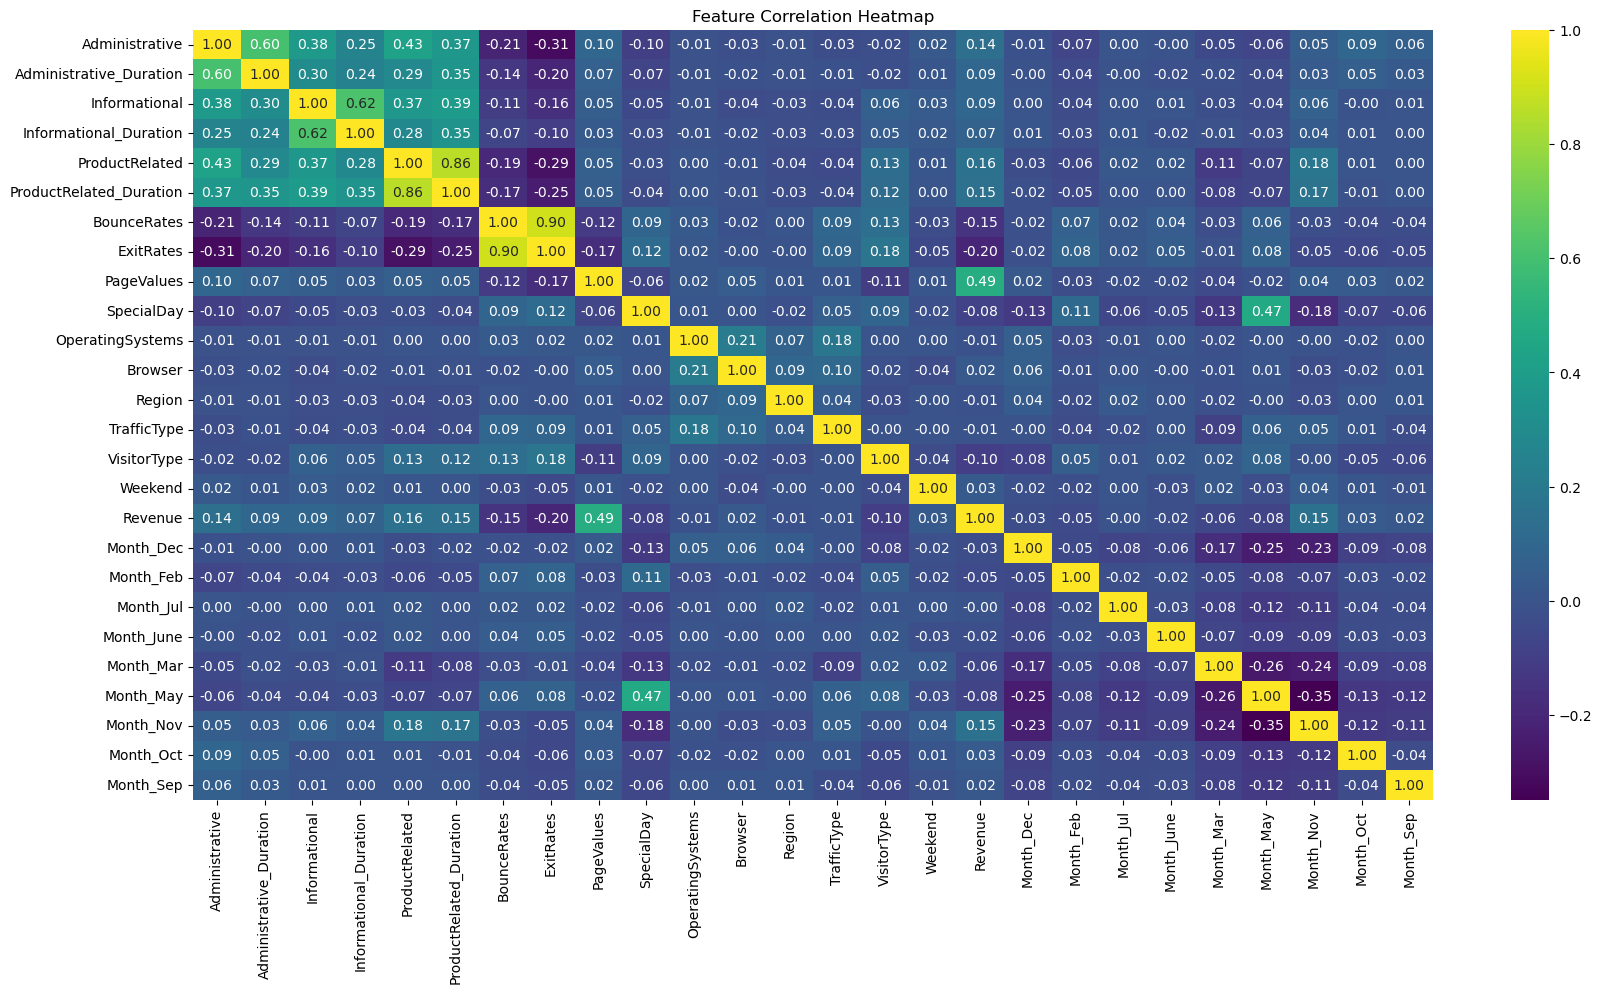

In [145]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [26]:
# Find highly correlated features (Threshold: 0.85)
corr_matrix = data_removed.corr()
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:  # Threshold can be adjusted
            col_name = corr_matrix.columns[i]
            high_corr_features.add(col_name)

print("Highly Correlated Features:", high_corr_features)

Highly Correlated Features: set()


In [28]:
from sklearn.feature_selection import mutual_info_classif

# Define X (features) and y (target)
X = data_removed.drop(columns=['Revenue'])  # Exclude target column
y = data_removed['Revenue']

# Compute mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for visualization
import pandas as pd
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
mi_df

,Feature,MI Score
8,PageValues,0.152100
5,ProductRelated_Duration,0.027195
7,ExitRates,0.027179
4,ProductRelated,0.014218
1,Administrative_Duration,0.013551
13,TrafficType,0.013013
6,BounceRates,0.012540
0,Administrative,0.011266
14,VisitorType,0.008999
2,Informational,0.006222


In [30]:
# Define a threshold based on the mean MI score
threshold = np.mean(mi_scores)  # Use the mean or set a custom threshold

# Select features with MI Score above the threshold
important_features = mi_df[mi_df['MI Score'] > threshold]['Feature'].tolist()
print("Selected Features:", important_features)

Selected Features: ['PageValues', 'ProductRelated_Duration', 'ExitRates', 'ProductRelated', 'Administrative_Duration', 'TrafficType']


Mutual Information

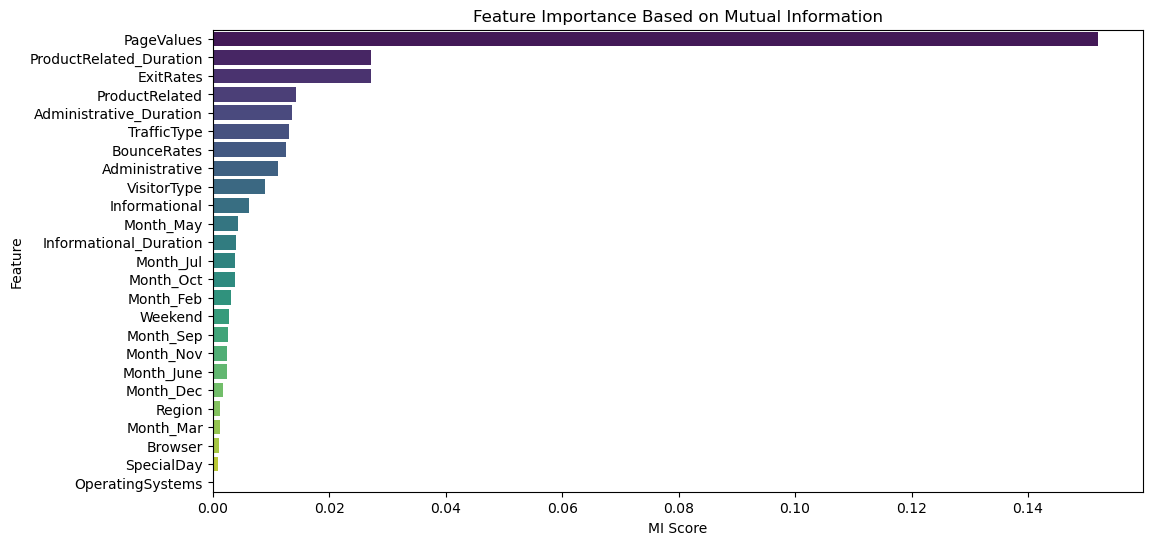

In [32]:
# Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis')
plt.title("Feature Importance Based on Mutual Information")
plt.show()

Recursive Feature Elimination

In [34]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(random_state=42)

# Apply RFE
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Administrative', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Region', 'TrafficType']


In [36]:
selected_features = ['ExitRates', 'PageValues', 'ProductRelated_Duration', 'Administrative_Duration', 'BounceRates', 'ProductRelated', 'TrafficType', 'Administrative']
final_data = data_removed[selected_features + ['Revenue']]

DATA SPLITTING

In [39]:
# Check the number of rows and columns in the selected dataset
print("\t")
print(f"The shape of the selected dataset is {final_data.shape}")

	
The shape of the selected dataset is (9566, 9)


In [41]:
X_selected = final_data.drop(columns=['Revenue'])
y_selected = final_data['Revenue']

# Perform Train-Test Split (80% Train, 20% Test)
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected, y_selected, test_size=0.2, stratify=y_selected, random_state=42)

# Display the Shape of Split Data
print("Training Set Shape:", X_selected_train.shape)
print("Testing Set Shape:", X_selected_test.shape)

Training Set Shape: (7652, 8)
Testing Set Shape: (1914, 8)


In [43]:
scaler = StandardScaler()
X_selected_train_scaled = scaler.fit_transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [45]:
print("Training set class distribution:")
print(y_selected_train.value_counts())

print("\nTest set class distribution:")
print(y_selected_test.value_counts())

Training set class distribution:
Revenue
False    6554
True     1098
Name: count, dtype: int64

Test set class distribution:
Revenue
False    1639
True      275
Name: count, dtype: int64


In [47]:
print("Training set class distribution (percentage):")
print(y_selected_train.value_counts(normalize=True) * 100)

print("\nTest set class distribution (percentage):")
print(y_selected_test.value_counts(normalize=True) * 100)

Training set class distribution (percentage):
Revenue
False    85.65081
True     14.34919
Name: proportion, dtype: float64

Test set class distribution (percentage):
Revenue
False    85.632184
True     14.367816
Name: proportion, dtype: float64


***Due to dataset imbalance, I will perform SMOTE analysis***

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_selected_train_scaled, y_selected_train)

MODEL INITIALIZATION

**Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the model with class weights
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_lr = lr_model.predict(X_selected_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_selected_test, y_pred_lr) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_selected_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_selected_test, y_pred_lr))

Accuracy: 86.57%

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.89      0.92      1639
        True       0.52      0.72      0.61       275

    accuracy                           0.87      1914
   macro avg       0.74      0.81      0.76      1914
weighted avg       0.89      0.87      0.87      1914


Confusion Matrix:
 [[1458  181]
 [  76  199]]


**Random Forest Classifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf_model.predict(X_selected_test_scaled)

# Evaluate
print(f"Accuracy: {accuracy_score(y_selected_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_selected_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_selected_test, y_pred_rf))

Accuracy: 88.35%

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.91      0.93      1639
        True       0.58      0.72      0.64       275

    accuracy                           0.88      1914
   macro avg       0.76      0.82      0.79      1914
weighted avg       0.90      0.88      0.89      1914


Confusion Matrix:
 [[1492  147]
 [  76  199]]


**Support Vector Machine (SVM)**

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Train the model
svm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_selected_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_selected_test, y_pred_svm) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_selected_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_selected_test, y_pred_svm))

Accuracy: 86.52%

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.88      0.92      1639
        True       0.52      0.75      0.61       275

    accuracy                           0.87      1914
   macro avg       0.74      0.82      0.77      1914
weighted avg       0.89      0.87      0.87      1914


Confusion Matrix:
 [[1450  189]
 [  69  206]]


**k-Nearest Neighbor (KNN)**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the KNN model with k=5 (default)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_selected_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_selected_test, y_pred_gb) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_selected_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_selected_test, y_pred_knn))

Accuracy: 88.56%

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.81      0.87      1639
        True       0.39      0.72      0.50       275

    accuracy                           0.80      1914
   macro avg       0.67      0.76      0.69      1914
weighted avg       0.86      0.80      0.82      1914


Confusion Matrix:
 [[1325  314]
 [  77  198]]


**Gradient Booster**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_selected_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_selected_test, y_pred_gb) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_selected_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_selected_test, y_pred_gb))

Accuracy: 88.56%

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.93      1639
        True       0.60      0.63      0.61       275

    accuracy                           0.89      1914
   macro avg       0.77      0.78      0.77      1914
weighted avg       0.89      0.89      0.89      1914


Confusion Matrix:
 [[1522  117]
 [ 102  173]]


**AdaBoost**

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=1000, random_state=42)

# Train the model
adaboost_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_selected_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_selected_test, y_pred_adaboost) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_selected_test, y_pred_adaboost))
print("\nConfusion Matrix:\n", confusion_matrix(y_selected_test, y_pred_adaboost))

Accuracy: 88.35%

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.92      0.93      1639
        True       0.58      0.66      0.62       275

    accuracy                           0.88      1914
   macro avg       0.76      0.79      0.78      1914
weighted avg       0.89      0.88      0.89      1914


Confusion Matrix:
 [[1510  129]
 [  94  181]]


**AUC-ROC Plot**

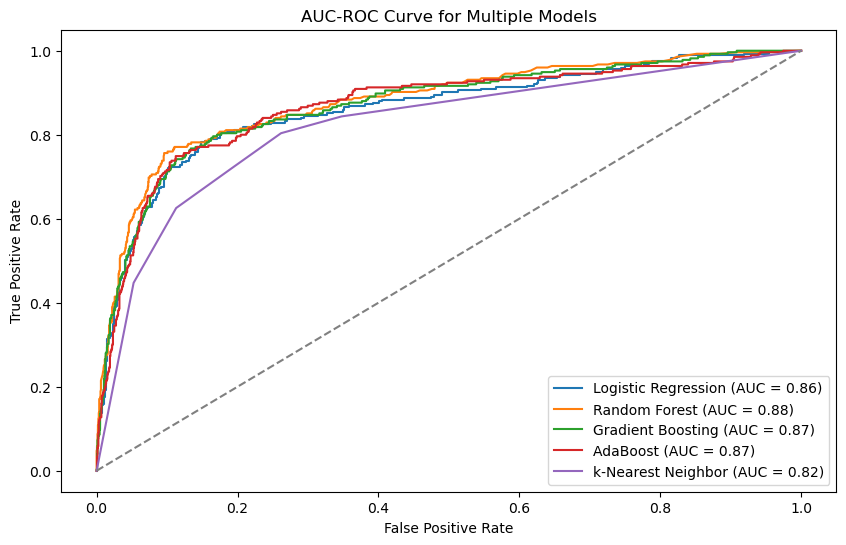

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize models
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "AdaBoost": adaboost_model,
    "k-Nearest Neighbor": knn_model
}

plt.figure(figsize=(10, 6))

# Plot ROC Curve for each model
for name, model in models.items():
    y_probs = model.predict_proba(X_selected_test_scaled)[:, 1]  # Get probability scores
    fpr, tpr, _ = roc_curve(y_selected_test, y_probs)
    auc_score = roc_auc_score(y_selected_test, y_probs)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Multiple Models")
plt.legend(loc="lower right")
plt.show()

In [72]:
import pandas as pd
from IPython.display import display
from sklearn.metrics import classification_report, accuracy_score

# Create a dictionary to store model names and their metrics
model_results = []

# List of models and predictions (Replace y_pred_* with actual prediction variables)
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest Classifier": y_pred_rf,
    "Support Vector Machine": y_pred_svm,
    "k-Nearest Neighbor": y_pred_knn,
    "Gradient Booster": y_pred_gb,
    "AdaBoost": y_pred_adaboost
}

# Loop through models and calculate performance metrics
for model_name, y_pred in models.items():
    report = classification_report(y_selected_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_selected_test, y_pred) * 100  # Convert to percentage

    # Append results to list
    model_results.append({
        "Model": model_name,
        "Accuracy": round(accuracy, 2),  # Accuracy as float for styling
        "Precision (False)": round(report["False"]["precision"], 2),
        "Recall (False)": round(report["False"]["recall"], 2),
        "F1-Score (False)": round(report["False"]["f1-score"], 2),
        "Precision (True)": round(report["True"]["precision"], 2),
        "Recall (True)": round(report["True"]["recall"], 2),
        "F1-Score (True)": round(report["True"]["f1-score"], 2)
    })

# Convert list to DataFrame
df_results = pd.DataFrame(model_results)

# Sort by Accuracy (Descending Order)
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Style table with Pandas Styler
styled_table = df_results.style.set_properties(**{
    'background-color': '#f4f4f4',  # Light gray background
    'color': 'black',  # Black text
    'border': '1px solid black',
    'text-align': 'center'
}).set_caption("🔹 Model Performance Comparison 🔹") \
  .set_table_styles([
      {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]}  # Green header
  ]).format({"Accuracy": "{:.2f}%"})  # Format accuracy with '%'

# Display the styled table
display(styled_table)

,Model,Accuracy,Precision (False),Recall (False),F1-Score (False),Precision (True),Recall (True),F1-Score (True)
4,Gradient Booster,88.56%,0.940000,0.930000,0.930000,0.600000,0.630000,0.610000
1,Random Forest Classifier,88.35%,0.950000,0.910000,0.930000,0.580000,0.720000,0.640000
5,AdaBoost,88.35%,0.940000,0.920000,0.930000,0.580000,0.660000,0.620000
0,Logistic Regression,86.57%,0.950000,0.890000,0.920000,0.520000,0.720000,0.610000
2,Support Vector Machine,86.52%,0.950000,0.880000,0.920000,0.520000,0.750000,0.610000
3,k-Nearest Neighbor,79.57%,0.950000,0.810000,0.870000,0.390000,0.720000,0.500000


***Accuracy Analysis***

1. **Gradient Booster (88.56%)** achieved the highest accuracy, meaning it classifies the most samples correctly.
2. *Random Forest (88.35%)* and *AdaBoost (88.35%)* follow closely, indicating strong ensemble learning models.
3. **Logistic Regression (86.57%)** and **SVM (86.52%)** perform slightly lower.
4. **k-Nearest Neighbor (79.57%)** has the lowest accuracy, which suggests it struggles more with complex decision boundaries.

*Takeaway: Gradient Booster is currently the best-performing model in terms of accuracy.*

***Precision (False)***

1. *Random Forest*, *Logistic Regression*, and *SVM* have the highest precision for the False class (0.95).
2. A high precision (False) means that when the model predicts a sample as False, it is likely correct.

*Takeaway: Logistic Regression and SVM are good choices if avoiding False Positives is important.*

***Recall (False)***

1. **Gradient Booster (0.93)** and **AdaBoost (0.92)** have the highest recall for the False class.
2. This means they correctly identify more of the actual False cases.

*Takeaway: Gradient Booster and AdaBoost minimize False Negatives, making them ideal when detecting the False class is critical.*

***Precision (True)***

1. **Gradient Booster (0.60)** has the highest precision for True.
2. This means when the model predicts True, it is correct 60% of the time.

*Takeaway: Gradient Booster is more confident in its True predictions.*

***Recall (True)***

1. **SVM (0.75)** has the highest Recall for the True class.
2. *Random Forest* & *Logistic Regression* (0.72) are next.
3. A high recall (True) means the model successfully finds more True cases.

*Takeaway: If identifying True cases is critical, SVM and Random Forest are strong options.*

***F1-Score (True)***

1. **Random Forest (0.64)** has the highest F1-Score for True.
2. This indicates a balance between precision and recall for True classifications.

*Takeaway: Random Forest achieves the best overall balance for the True class.*

***FINAL CONCLUSION***

1. **Best Model Overall**: **GRADIENT BOOSTER** (highest accuracy and good recall/precision balance).
2. **Best for Reducing False Positives**: Logistic Regression, SVM (highest Precision False).
3. **Best for Detecting True Cases**: SVM, Random Forest (highest Recall True).
4. **Most Balanced**: Random Forest (good performance across all metrics).